In [52]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.feature_extraction import DictVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
train_data = pd.read_csv('./train.csv')
test_data = pd.read_csv('./test.csv')

In [54]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [55]:
train_data.Age.fillna(train_data.Age.mean(),inplace=True)
# train_data.Age

In [56]:
train_data.Fare.fillna(train_data.Fare.mean(),inplace=True)

In [57]:
train_data.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [58]:
train_data.Embarked.fillna('S',inplace=True)

In [59]:
features = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']

In [60]:
train_features=train_data[features]

In [61]:
train_data_hot_encoded = train_features.drop('Embarked',1).join(train_features.Embarked.str.get_dummies())
train_data_hot_encoded = train_data_hot_encoded.drop('Sex',1).join(train_data_hot_encoded.Sex.str.get_dummies())
train_data_hot_encoded.head()


,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male
0,3,22.0,1,0,7.2500,0,0,1,0,1
1,1,38.0,1,0,71.2833,1,0,0,1,0
2,3,26.0,0,0,7.9250,0,0,1,1,0
3,1,35.0,1,0,53.1000,0,0,1,1,0
4,3,35.0,0,0,8.0500,0,0,1,0,1


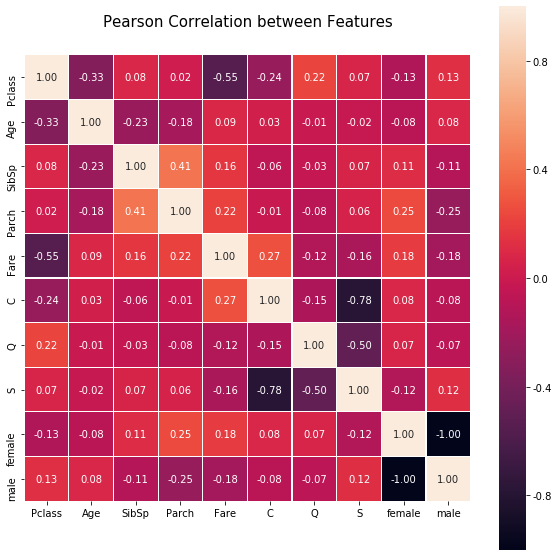

In [62]:
#显示特征之间的相关系数
plt.figure(figsize=(10,10))
plt.title('Pearson Correlation between Features',y=1.05,size=15)
#计算皮尔逊相关系数
sns.heatmap(train_data_hot_encoded.corr(),linewidths=0.1,vmax=1.0, fmt= '.2f', square=True,linecolor='white',annot=True)
plt.show()

In [63]:
train_data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

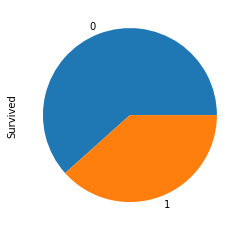

In [64]:
train_data.Survived.value_counts().plot(kind='pie',label='Survived')
plt.show()

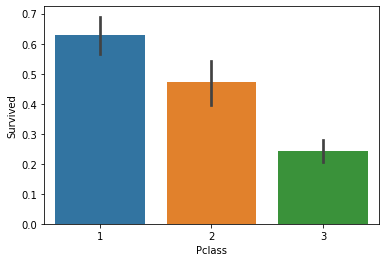

In [65]:
sns.barplot(x='Pclass',y='Survived',data=train_data)
plt.show()

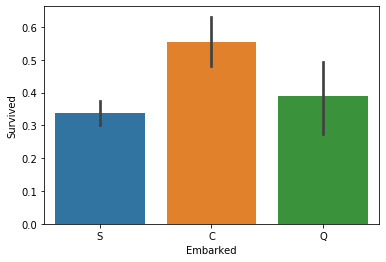

In [66]:
sns.barplot(x='Embarked',y='Survived',data=train_data)
plt.show()

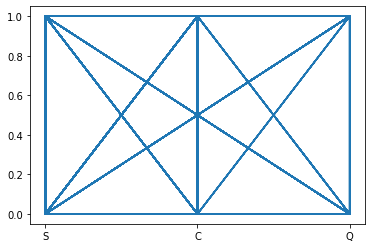

In [70]:
def train(train_features,train_labels):
    clf=DecisionTreeClassifier()
    clf.fit(train_features,train_labels)
    coeffs=clf.feature_importances_
    print(coeffs)
    df_co=pd.Series(coeffs,index=train_features.columns)
    print(df_co)
    df_co.plot(kind='barh')
    plt.title('Feature importance')
    plt.show()
    return clf

In [71]:
train_data_hot_encoded.head()

,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male
0,3,22.0,1,0,7.2500,0,0,1,0,1
1,1,38.0,1,0,71.2833,1,0,0,1,0
2,3,26.0,0,0,7.9250,0,0,1,1,0
3,1,35.0,1,0,53.1000,0,0,1,1,0
4,3,35.0,0,0,8.0500,0,0,1,0,1


[0.10751562 0.25105601 0.04893896 0.0310104  0.23227473 0.00519849
 0.00621523 0.00845538 0.         0.30933519]
Pclass    0.107516
Age       0.251056
SibSp     0.048939
Parch     0.031010
Fare      0.232275
C         0.005198
Q         0.006215
S         0.008455
female    0.000000
male      0.309335
dtype: float64


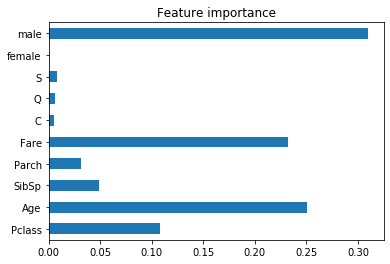

In [76]:
clf=train(train_data_hot_encoded,train_data['Survived'])

In [77]:
#决策树可视化
import pydotplus
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz

In [81]:
def show_tree(clf):
	dot_data = StringIO()
	export_graphviz(clf, out_file=dot_data)
	graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
	graph.write_pdf("titanic_tree.pdf")

show_tree(clf)